In [1]:
import cv2
print(cv2.__version__)

4.5.1


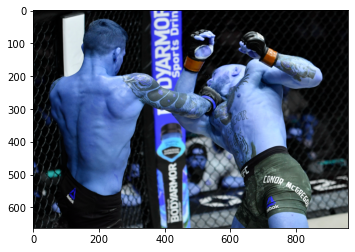

In [3]:
# 1.1. Download an image of your choosing and display it
import urllib.request
from matplotlib import pyplot as plt
%matplotlib inline

url = 'https://talksport.com/wp-content/uploads/sites/5/2021/01/GettyImages-1298057165.jpg?strip=all&w=960&quality=100'
file_name = 'mac_lost_by_diamond.jpg'
urllib.request.urlretrieve(url, file_name)

img = cv2.imread(file_name)
plt.imshow(img)

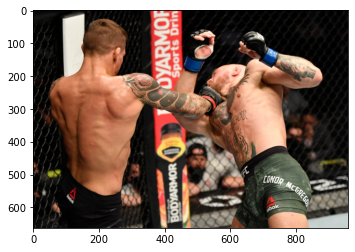

In [9]:
import numpy as np
img_corrected = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
plt.imshow(img_corrected)

Text(0.5, 1.0, 'Grayscale Image')

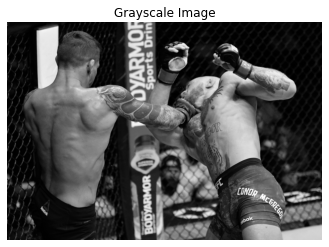

In [10]:
gray_img = cv2.cvtColor(img_corrected, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")
plt.axis("off") #remove axes ticks
plt.title('Grayscale Image')

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

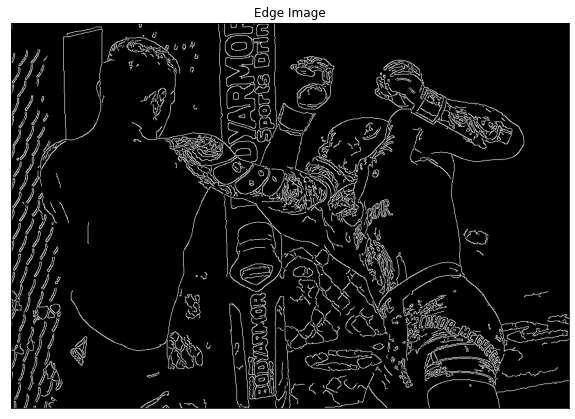

In [13]:
rcParams['figure.figsize'] = 10, 12


edges = cv2.Canny(img_corrected, 
                  threshold1=100, 
                  threshold2=200)

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

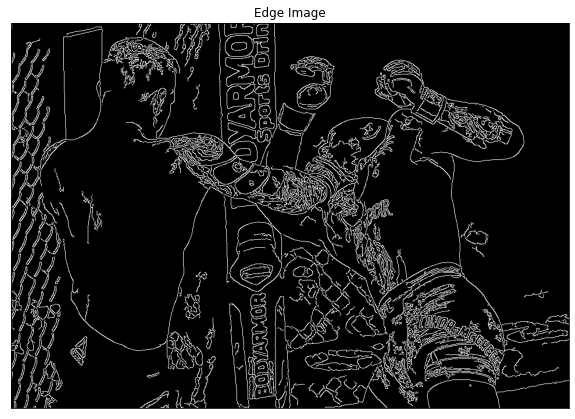

In [14]:
rcParams['figure.figsize'] = 10, 12

edges = cv2.Canny(img_corrected, 
                  threshold1=1,   ## try different values here
                  threshold2=200) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

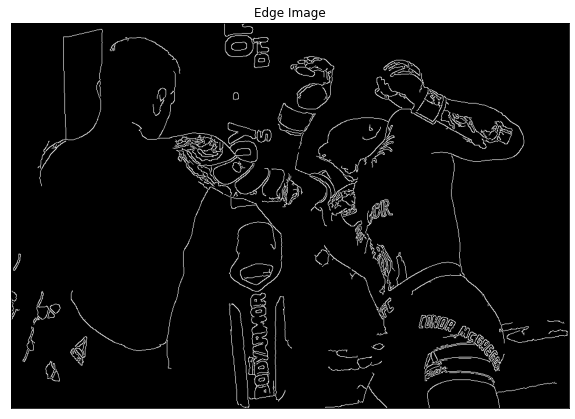

In [15]:
rcParams['figure.figsize'] = 10, 12

edges = cv2.Canny(img_corrected, 
                  threshold1=100,   ## try different values here
                  threshold2=500) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

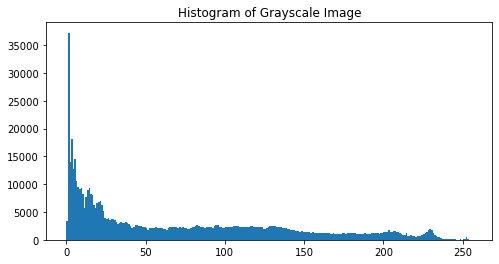

In [12]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,4
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram of Grayscale Image')
plt.show()

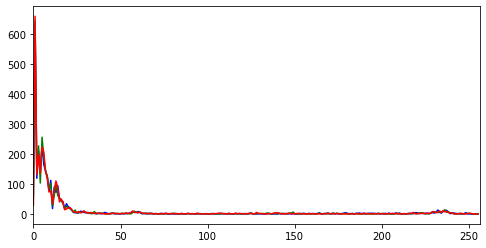

In [17]:
rcParams['figure.figsize'] = 8, 4

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist(img_corrected,[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Compress the image 

Compressed size of butterfly image is: 163 Kilo Bytes


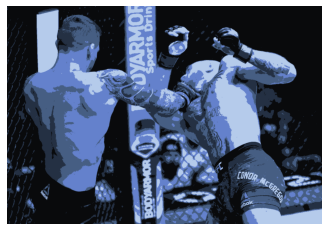

In [22]:
from sklearn.cluster import KMeans
import math
import os

num_rows = img_corrected.shape[0]
num_cols = img_corrected.shape[1]
transform_image_for_KMeans = img_corrected.reshape(num_rows * num_cols, 3)


#Perform KMeans to compress butterfly image here, feel free to choose
#any value for K, (i.e. K < 256) for compressing the image size. Use the value
#of K to fill the value of n_clusters**


kmeans = KMeans(n_clusters=5)
kmeans.fit(transform_image_for_KMeans)
cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 


#labels represent the label of each pixel and which cluster it belongs to


labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols)


#After running the above code, run the code below


compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]
cv2.imwrite("compressed_image.png", compressed_image)
compressed_im = cv2.imread('compressed_image.png')
compressed_im_corrected = cv2.cvtColor(compressed_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_im_corrected)
print("Compressed size of image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_image.png').st_size)/1000))))
